In [111]:
import matplotlib.pyplot as plt
import numpy as np

In [112]:
def TP(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 1, y_gt == 1))


def FP(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 0, y_gt == 1))


def FN(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 1, y_gt == 0))


def TN(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 0, y_gt == 0))


def precision(y_pred: np.array, y_gt: np.array):
    return TP(y_pred, y_gt) / (TP(y_pred, y_gt) + FP(y_pred, y_gt))


def recall(y_pred: np.array, y_gt: np.array):
    return TP(y_pred, y_gt) / (TP(y_pred, y_gt) + FN(y_pred, y_gt))


def TPR(y_pred: np.array, y_gt: np.array):
    return recall(y_pred, y_gt)


def FPR(y_pred: np.array, y_gt: np.array):
    return FP(y_pred, y_gt) / (FP(y_pred, y_gt) + TN(y_pred, y_gt))

In [113]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

number_of_samples = 1000
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=14, n_classes=2, n_samples=number_of_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

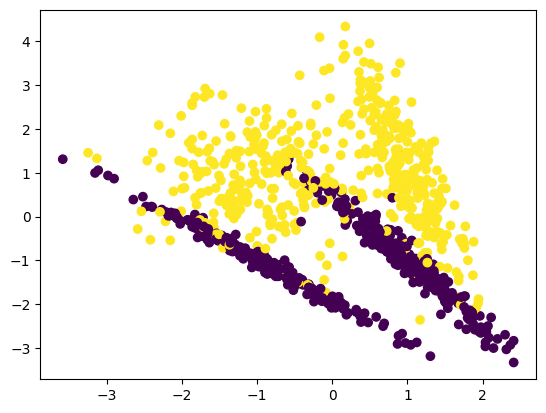

In [114]:
plt.rcParams['figure.dpi'] = 100
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [KNeighborsClassifier(10), LogisticRegression()]

In [116]:
def PR_curve(pred, gt):
    rec = np.zeros_like(pred)
    prec = np.zeros_like(pred)
    for i, threshold in enumerate(sorted(pred.copy())):
        y_predict = pred >= threshold
        rec[i] = recall(y_predict, gt)
        prec[i] = precision(y_predict, gt)
    return prec, rec

In [117]:
def ROC_curve(pred, gt):
    fpr = np.zeros_like(pred)
    tpr = np.zeros_like(pred)
    for i, threshold in enumerate(sorted(pred.copy())):
        try:
            y_predict = pred >= threshold
            fpr[i] = FPR(y_predict, gt)
            tpr[i] = TPR(y_predict, gt)
        except ZeroDivisionError:
            continue
    return fpr, tpr

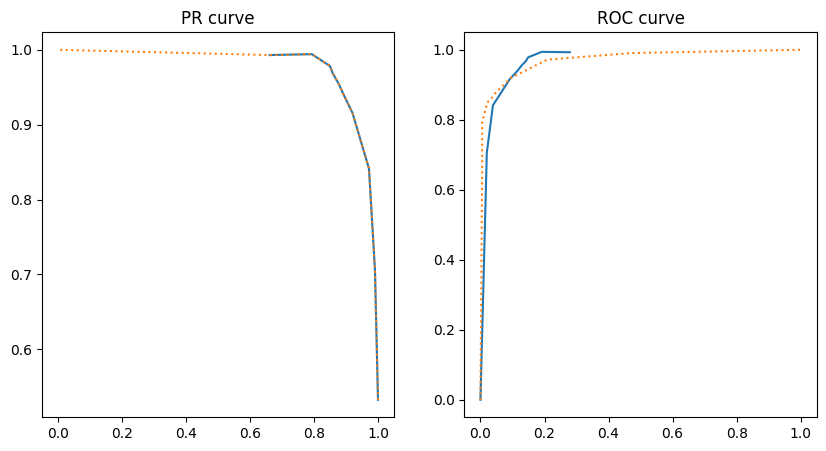

PR AUC = 0.44337866940431003
ROC AUC = 0.2512846461349216
Lib PR AUC = 0.9782095561331337
Lib ROC AUC = 0.9715673721473224


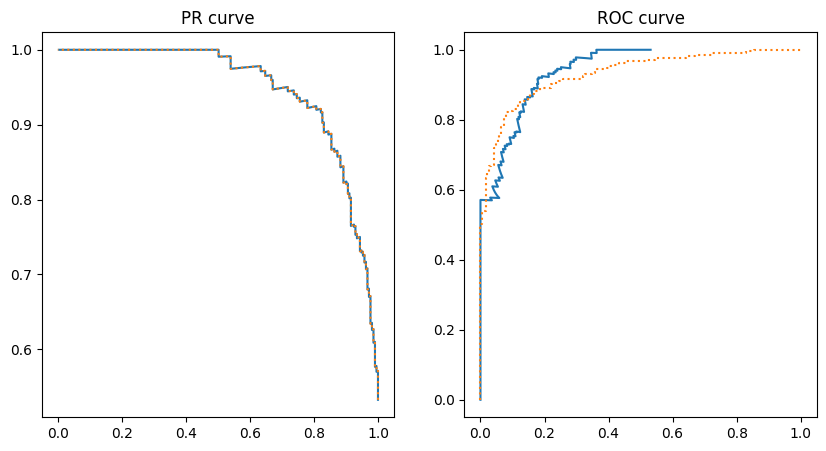

PR AUC = 0.41543181559385645
ROC AUC = 0.4735672443778289
Lib PR AUC = 0.9479318155938564
Lib ROC AUC = 0.9314604202756647


In [119]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve

for classifier in classifiers:
    plt.figure(figsize=(10, 5), dpi=100)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict_proba(X_test)[:, 1]
    Recall, Precision = PR_curve(predictions, y_test)
    fpr, tpr = ROC_curve(predictions, y_test)

    lib_prs, lib_rec, _ = precision_recall_curve(y_test, predictions)
    lib_pr_auc = auc(lib_rec, lib_prs)
    lib_fpr, lib_tpr, _ = roc_curve(y_test, predictions)
    lib_roc_auc = auc(lib_fpr, lib_tpr)

    plt.subplot(121)
    plt.title('PR curve')
    plt.plot(Recall, Precision)
    plt.plot(lib_rec, lib_prs, ':')
    plt.subplot(122)
    plt.title('ROC curve')
    plt.plot(fpr, tpr)
    plt.plot(lib_fpr, lib_tpr, ':')
    plt.show()
    print('PR AUC = ' + str(np.trapz(Recall, Precision)))
    print('ROC AUC = ' + str(np.trapz(tpr, fpr)))
    print('Lib PR AUC = ' + str(lib_pr_auc))
    print('Lib ROC AUC = ' + str(lib_roc_auc))